# Predicting heart disease risk from CDC BRFSS Data

BRFSS data is collected by CDC annually. The data contains the answers to different behaviour question like smoking, drinking, physical acitivity history of different persons collected over different states in USA. Along with that the data also contains the some medical history of the patients. 
The source of the data is : https://www.cdc.gov/brfss/annual_data/annual_2020.html

## We collect the data in RAW format and convverted it into .csv format
(Please follow this link to convert the ASCII file to CSV file: 
https://github.com/arindam-mazumdar/BRFSS/blob/main/ASCII_to_CSV_coversion.py)

Some features of the data set is follows:

-  _SEX  ## Male = 1 , Female = 2
-  DIABAGE3 # How old were you when you were told you had diabetes 0-97 : 98-99 refused or not known
-  LCSFIRST : How old were you when you first started to smoke cigarettes regularly: 1-100, otherwise refused
- LCSLAST : How old were you when you last smoked cigarettes regularly? 1-100, otherwise refused
-  CNCRAGE  : At what age were you told that you had cancer? 1-97, otherwise refused
-  _HCVU651 : Healthcare coverage : 1 = Has, 2 = Does not have, 9 = refused
-  _AGEG5YR : Age category: 1 to 13 : age : 18-99, 14 means refused
-  _AGE65YR : 2 category age group : 18-64 = 1, above 64 = 2, 3= refused
-  _AGE_G : Six-level imputed age category : value 1-6
-  _PRACE1 : Race in 1-8 values, other values refused or missing
-  _MRACE1 : Race calcuated 1-7 values, other values refused or missing
- SMOKE100 : Smoked atleast 100 cigs in life : 1= Yes, other values No or refused
- SMOKDAY2: Do you smoke now. 1= Everyday, 2= Someday, other values = refused or don't know 
- LASTSMK2: When did you last smoked.values 1-7, other values = refused or not applicable
-  LCSNUMCG: When you smoked how many cigs daily: 1-300, other values = refused or not applicable
-  _SMOKER3 : Four-level smoker status: Everyday smoker(1), Someday smoker(2), Former smoker(3), Non-smoker(4): value 9 = refused
-  _RFSMOK3: Adults who are current smokers: No(1), Yes(2), other value = refused or NA
-  CVDINFR4 :  had a heart attack, also called a myocardial infarction? Yes: 1, other values : no or refused or NA
-  CVDCRHD4: had angina or coronary heart disease? Yes: 1, other values : no or refused or NA
-  CVDSTRK3 : Had stroke? Yes: 1, other values : no or refused or NA
-  DIABETE4 : Had diabetes: Yes: 1, other values : no or refused or NA
-  DIABAGE3 : Age when you got diabetes: value 1-97 , other values : no or refused or NA
-  _MICHD : Calculated variable of having coronary disease: has cardiac problem = 1, no = 2, ' ' = refused
-  _RACE : Race calcuated 1-8 values, other values refused or missing
- WTKG3 : Weight in Kg
- SMOKE : Four-level smoker status: Everyday smoker(1), Someday smoker(2), Former smoker(3), Non-smoker(4): value 9 is replaced with 4
- _TOTINDA : Has regular physical activity or not 
- _RFDRHV7 : Heavy drinking or not

The total description of different columns are available in CDC code book (https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf)

For buliding a prediction model for heart disease we choose some of the particulars columns. The EDA visualizaion of these parameters are shown bellow


In [2]:
import pandas as pd
df = pd.read_csv('wrangled_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df=df[df['_AGEG5YR']!=14]

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df.head()

,_SEX,_HCVU651,_AGEG5YR,_RACE,WTKG3,DIABETE4,_TOTINDA,_RFDRHV7,SLEPTIM1,SMOKE,MICHD,HEIGHT
0,2.0,2,8.0,1,48.080000,1,1.0,1.0,5,1,0,170.00000
1,2.0,2,10.0,2,77.110000,0,1.0,9.0,7,4,0,163.00000
2,2.0,2,10.0,2,82.320386,0,1.0,1.0,7,4,0,173.00000
3,2.0,2,13.0,1,82.320386,0,2.0,1.0,6,4,0,170.12426
4,2.0,2,13.0,1,57.150000,0,1.0,1.0,7,4,0,168.00000


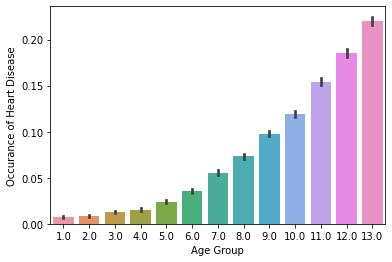

In [5]:
sns.barplot(x= '_AGEG5YR', y='MICHD', data = df)
plt.xlabel('Age Group')
plt.ylabel('Occurance of Heart Disease')
plt.savefig('age.png')

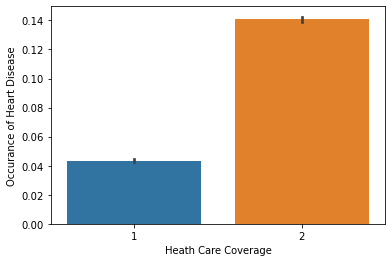

In [26]:
sns.barplot(x= '_HCVU651', y='MICHD', data = df)
plt.xlabel('Heath Care Coverage')
plt.ylabel('Occurance of Heart Disease')
plt.savefig('coverage.png')

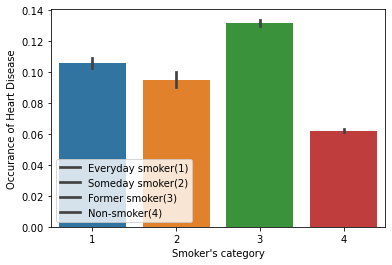

In [27]:
sns.barplot(x= 'SMOKE', y='MICHD', data = df)
plt.xlabel("Smoker's category")
plt.ylabel('Occurance of Heart Disease')
plt.legend(['Everyday smoker(1)', 'Someday smoker(2)', 'Former smoker(3)', 'Non-smoker(4)'])
plt.savefig('smoker.png')

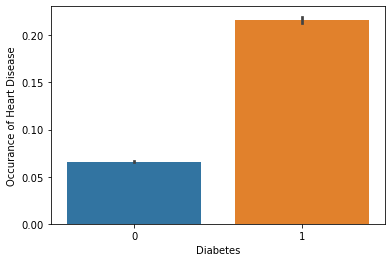

In [28]:
sns.barplot(x= 'DIABETE4', y='MICHD', data = df)
plt.xlabel("Diabetes")
plt.ylabel('Occurance of Heart Disease')
plt.savefig('diab.png')

Text(0, 0.5, 'Occurance of Heart Disease')

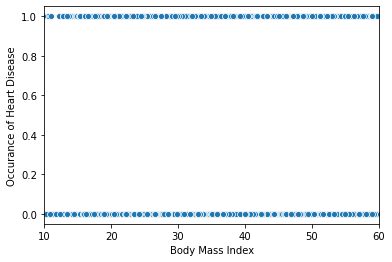

In [7]:
df['BMI'] = df['WTKG3']/(pow(df['HEIGHT']/100., 2))
sns.scatterplot(x= 'BMI', y='MICHD', data = df)
plt.xlim(10,60)
plt.xlabel("Body Mass Index")
plt.ylabel('Occurance of Heart Disease')

Text(0.5, 0, 'Body Mass Index')

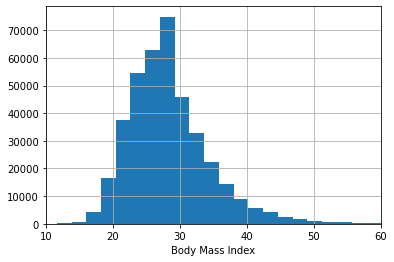

In [8]:
df['BMI'].hist(bins=100)
plt.xlim(10,60)
plt.xlabel('Body Mass Index')

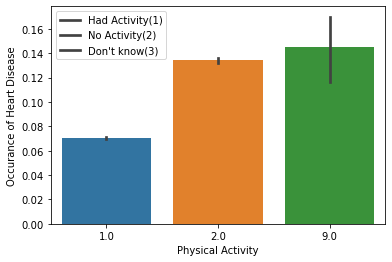

In [29]:
sns.barplot(x= '_TOTINDA', y='MICHD', data = df)
plt.xlabel("Physical Activity")
plt.ylabel('Occurance of Heart Disease')
plt.legend(['Had Activity(1)', 'No Activity(2)', "Don't know(3)"])
plt.savefig('activity.png')
#plt.savefig('')

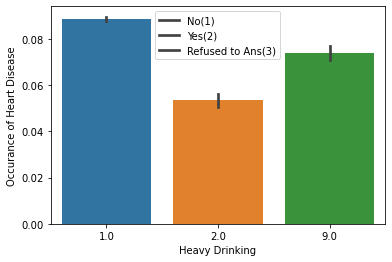

In [30]:
sns.barplot(x= '_RFDRHV7', y='MICHD', data = df)
plt.xlabel("Heavy Drinking")
plt.ylabel('Occurance of Heart Disease')
plt.legend(['No(1)', 'Yes(2)', "Refused to Ans(3)"])
plt.savefig('drinking.png')
#plt.savefig('')

We can see that Occurance of Heart Disease highly depends on availability of heath coverage, age, history of diabetes and smoking. Therefore we use these varaibles to constaruct a classifier model for predicting heart disease in a test data set. Our expolrations of classifiers are in the
"**heart-classifiers.ipynb**" notebook

## Bad data points

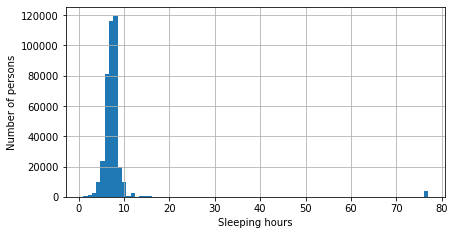

In [13]:
df['SLEPTIM1'].hist(bins=80, figsize=(6.8,3.5))
#plt.xlim(0,10)
plt.xlabel('Sleeping hours')
plt.ylabel('Number of persons')
plt.savefig('sleeping_bad.png', dpi=100)